<a href="https://colab.research.google.com/github/TheVioletRaven/NSE_OU/blob/master/Casus_Open_Universiteit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Notebook gemaakt door: Aukje Reina van Montfort (1704095), Silas Dannulis (2100940), Niema Mahmoudi (1807633) en Viktor Wenemoser (2101260)***

# Installatie van Anaconda en NumPy

## Anaconda package install

> Anaconda is een open-source distributie van Python voor wetenschappelijk rekenen. Het bevat veelgebruikte tools voor datawetenschap, zoals Jupyter, pandas, numpy, scikit-learn, matplotlib, en meer. Deze installatie vindt enkel plaats in het EDA notebook en dient meer als illustratie dat het gedaan moet worden voorafgaand de Jupyter Notebooks van PI7.



In [26]:
#!pip install -q condacolab
#import condacolab
#condacolab.install()

# Controle Anaconda package install en versie
#!conda --version

## Panda Numpy install

> NumPy (Numerical Python) is een fundamentele bibliotheek voor wetenschappelijk rekenen met Python. Het biedt ondersteuning voor grote, multi-dimensionale arrays en matrices, samen met een verzameling wiskundige functies om met deze arrays te werken. Wederom vindt deze installatie enkel plaats in het EDA notebook.







In [27]:
#!conda install pandas numpy matplotlib

# EDA Notebook
Eerste blik op de data

## Library imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import unittest
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.decomposition import PCA # wordt gebruikt voor dimensie reductie (data preparatie)
from sklearn.preprocessing import StandardScaler, MinMaxScaler # wordt gebruikt voor normalisatie (data preparatie)
from scipy.stats import zscore # Wordt gebruikt 2 om outliers te verwijderen (data preparatie)
from sklearn.cluster import KMeans # Voor clusteranalyse
from sklearn.impute import SimpleImputer

## Importeren van de csv file

**Belangrijke informatie NSE dataset:**

De dataset is in week 7 van blokperiode 4 geleverd door Mattie Hermans van de Open Universiteit te Heerlen. Gevoelige informatie staat aangekaart middels een negatief cijfer (zoals -4) en de data is mede interpreteerbaar middels het "NSE2024_Bestandsbeschrijving_definitief_Instellingsbestand.xlsx."


> *Notitie: De datasets kan worden ingeladen middels Google Colab óf middels een tool zoals Visual Studio Code, vandaar het tweetal codeblocks om de data in te laden.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Pad naar de datasets
NSE_bestand_OU = "/content/drive/MyDrive/Colab Notebooks/Dataset/NSE_Instellingsbestand_2024.csv"
df = pd.read_csv(NSE_bestand_OU, delimiter=';', skiprows=4)

In [29]:
# Laad het Excel-bestand
file_path = 'Kopie van NSE Instellingsbestand 2024.xlsx'
df = pd.read_excel(file_path, sheet_name='NSE Instellingsbestand 2024')

# verwijder rijen met negatieve waarden
df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Definieer kolommen om te verwijderen
columns_to_drop = df.columns[df.isnull().sum() >= (len(df) - 1000)].tolist()
columns_to_drop.extend(['BrinActueel', 'Brin', 'BrinNaamActueel', 'BrinNaam', 'CrohoActueel', 'Croho', 'CrohoNaam', 'Locatie', 'CrohoSector', 'Responsdatum', 'UniekNummer'])

# print kolommen die verwijderd worden 
print(f"Kolommen die worden verwijderd: {columns_to_drop}") 

# verwijder kolommen
df = df.drop(columns_to_drop, axis=1) 

# Vervang lege velden door 'NaN'
df = df.fillna(np.nan)

# Converteer categorische kolommen naar dummy variabelen
df = pd.get_dummies(df, columns=['CrohoNaamActueel', 'CrohoSectorNaam'], drop_first=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean') 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Selecteer numerieke kolommen voor schaling
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns

# Normaliseer de numerieke data met MinMaxScaler
scaler = MinMaxScaler()
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

# Sla de geschaalde DataFrame op in een nieuw CSV-bestand
df_imputed.to_csv('NSE_Instellingsbestand_scaled.csv', index=False)

columns = df_imputed.columns.to_list() 

print (f'kolomnamen: {columns}')

# Toon de eerste paar rijen van de geschaalde DataFrame
print(df_imputed.head())

C:\Users\Punderella\AppData\Local\Temp\ipykernel_12944\1774068052.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


Kolommen die worden verwijderd: ['Gemeentecode', 'Stedelijkheid', 'Landsdeel', 'Leerroute_track', 'Label1', 'Label2', 'Label3', 'Label4', 'Label5', 'Label6', 'Label7', 'Kunstopleiding', 'Hoofdopleiding', 'Geslacht', 'Leeftijd', 'StudiejaarStudent', 'Vooropleiding', 'Woonsituatie', 'TEVREDENHEIDALGEMEEN_04', 'ONDERSTEUNING_02_ADHD', 'ONDERSTEUNING_02_AUTISME', 'ONDERSTEUNING_02_DYSLEXIE', 'ONDERSTEUNING_02_CHRONISCH', 'ONDERSTEUNING_02_PSYCHISCH', 'ONDERSTEUNING_02_VISUEELAUDITIEF', 'ONDERSTEUNING_02_MOTORISCH', 'ONDERSTEUNING_02_HERSTEL', 'ONDERSTEUNING_02_TOPSPORT', 'ONDERSTEUNING_02_ONDERNEMERSCHAP', 'ONDERSTEUNING_02_FAMILIE', 'ONDERSTEUNING_02_PERSOONLIJK', 'ONDERSTEUNING_02_ANDERS', 'ONDERSTEUNING_03_TOETS_ADHD', 'ONDERSTEUNING_03_TOETS_AUTISME', 'ONDERSTEUNING_03_TOETS_DYSLEXIE', 'ONDERSTEUNING_03_TOETS_CHRONISCH', 'ONDERSTEUNING_03_TOETS_PSYCHISCH', 'ONDERSTEUNING_03_TOETS_VISUEELAUDITIEF', 'ONDERSTEUNING_03_TOETS_MOTORISCH', 'ONDERSTEUNING_03_TOETS_HERSTEL', 'ONDERSTEUNING_03_T

> Indien scaled instellingsbestand al bestaat, hoeft enkel onderstaande codeblock te worden gebruikt.

In [3]:
df = 'NSE_Instellingsbestand_scaled.csv'

# Laad datasets
df_imputed = pd.read_csv('NSE_Instellingsbestand_scaled.csv')

print(df_imputed)

      UniekNummer  Jaar  Weegfactor  BrinvolgnummerActueel  BrinVolgnummer  \
0        0.961452   1.0    0.711201                    0.0             0.0   
1        0.962014   1.0    0.711201                    0.0             0.0   
2        0.962552   1.0    0.711201                    0.0             0.0   
3        0.962792   1.0    0.711201                    0.0             0.0   
4        0.964731   1.0    0.711201                    0.0             0.0   
...           ...   ...         ...                    ...             ...   
6241     0.492491   0.5    0.215514                    0.0             0.0   
6242     0.499387   0.5    0.215514                    0.0             0.0   
6243     0.507994   0.5    0.215514                    0.0             0.0   
6244     0.511582   0.5    0.215514                    0.0             0.0   
6245     0.519904   0.5    0.215514                    0.0             0.0   

      SoortHo  BaMa  Fixus  Decentraal  Bekostiging  ...  \
0  

In [14]:
# Unit tests
class TestPCA(unittest.TestCase):
    def setUp(self):
        self.df = df.select_dtypes(include=['float64', 'int64'])
        self.df_imputed = df_imputed.select_dtypes(include=['float64', 'int64'])

    def test_no_outliers(self):
        z_scores = np.abs(zscore(self.df))
        df_no_outliers = self.df[(z_scores < 7).all(axis=1)]
        self.assertFalse(df_no_outliers.empty, "All rows are considered outliers with the current threshold.")

    def test_n_components(self):
        pca_df, _, n_components, _, _ = process_pca(self.df)
        self.assertGreaterEqual(n_components, 1, "Number of components should be at least 1.")

    def test_pca_shape(self):
        pca_df, _, n_components, _, _ = process_pca(self.df)
        self.assertEqual(pca_df.shape[1], n_components, "PCA result should have the correct number of components.")

    def test_scaled_data(self):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.df)
        self.assertAlmostEqual(np.mean(scaled_data), 0, places=5, msg="Scaled data mean should be close to 0.")
        self.assertAlmostEqual(np.std(scaled_data), 1, places=5, msg="Scaled data standard deviation should be close to 1.")

    def test_no_outliers_imputed(self):
        z_scores_imputed = np.abs(zscore(self.df_imputed))
        df_no_outliers_imputed = self.df_imputed[(z_scores_imputed < 7).all(axis=1)]
        self.assertFalse(df_no_outliers_imputed.empty, "All rows are considered outliers for df_imputed with the current threshold.")

    def test_n_components_imputed(self):
        pca_df_imputed, _, n_components_imputed, _, _ = process_pca(self.df_imputed)
        self.assertGreaterEqual(n_components_imputed, 1, "Number of components should be at least 1 for df_imputed.")

    def test_pca_shape_imputed(self):
        pca_df_imputed, _, n_components_imputed, _, _ = process_pca(self.df_imputed)
        self.assertEqual(pca_df_imputed.shape[1], n_components_imputed, "PCA result should have the correct number of components for df_imputed.")

    def test_scaled_data_imputed(self):
        scaler = StandardScaler()
        scaled_data_imputed = scaler.fit_transform(self.df_imputed)
        self.assertAlmostEqual(np.mean(scaled_data_imputed), 0, places=5, msg="Scaled data mean should be close to 0 for df_imputed.")
        self.assertAlmostEqual(np.std(scaled_data_imputed), 1, places=5, msg="Scaled data standard deviation should be close to 1 for df_imputed.")

# Run the tests
unittest.main(argv=[''], verbosity=2, exit=False)

test_n_components (__main__.TestPCA.test_n_components) ... ERROR
test_n_components_imputed (__main__.TestPCA.test_n_components_imputed) ... ERROR
test_no_outliers (__main__.TestPCA.test_no_outliers) ... ERROR
test_no_outliers_imputed (__main__.TestPCA.test_no_outliers_imputed) ... ERROR
test_pca_shape (__main__.TestPCA.test_pca_shape) ... ERROR
test_pca_shape_imputed (__main__.TestPCA.test_pca_shape_imputed) ... ERROR
test_scaled_data (__main__.TestPCA.test_scaled_data) ... ERROR
test_scaled_data_imputed (__main__.TestPCA.test_scaled_data_imputed) ... ERROR

ERROR: test_n_components (__main__.TestPCA.test_n_components)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Punderella\AppData\Local\Temp\ipykernel_26948\3906777168.py", line 4, in setUp
    self.df = df.select_dtypes(include=['float64', 'int64'])
              ^^^^^^^^^^^^^^^^
AttributeError: 'str' object has no attribute 'select_dtypes'

ERROR: test_n_co

In [4]:
# Print een gedeelte van de data om de structuur te verifiëren
print("\nData Sample:")
print(df_imputed.head())


Data Sample:
   UniekNummer  Jaar  Weegfactor  BrinvolgnummerActueel  BrinVolgnummer  \
0     0.961452   1.0    0.711201                    0.0             0.0   
1     0.962014   1.0    0.711201                    0.0             0.0   
2     0.962552   1.0    0.711201                    0.0             0.0   
3     0.962792   1.0    0.711201                    0.0             0.0   
4     0.964731   1.0    0.711201                    0.0             0.0   

   SoortHo  BaMa  Fixus  Decentraal  Bekostiging  ...  \
0      0.0   0.0    0.0         0.0          0.0  ...   
1      0.0   0.0    0.0         0.0          0.0  ...   
2      0.0   0.0    0.0         0.0          0.0  ...   
3      0.0   0.0    0.0         0.0          0.0  ...   
4      0.0   0.0    0.0         0.0          0.0  ...   

   CrohoNaamActueel_M Onderwijswetenschappen  CrohoNaamActueel_M Psychology  \
0                                        0.0                            0.0   
1                                 

In [ ]:
# Functie om statistieken te berekenen
def calculate_stats(column):
    return [
        column.var(),
        column.std(),
        column.mean(),
        column.median(),
        column.mode()[0] if not column.mode().empty else None
    ]

# Selecteer numerieke kolommen
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric Columns:", numeric_columns)


Numeric Columns: ['UniekNummer', 'Jaar', 'Weegfactor', 'BrinvolgnummerActueel', 'BrinVolgnummer', 'SoortHo', 'BaMa', 'Fixus', 'Decentraal', 'Bekostiging', 'Opleidingsvorm3', 'Opleidingsvorm2', 'TypeStudent', 'Afstandsonderwijs', 'Internationale_Student', 'studiejaar', 'TEVREDENHEIDALGEMEEN_01', 'TEVREDENHEIDALGEMEEN_02', 'TEVREDENHEIDALGEMEEN_03', 'TEVREDENHEIDALGEMEEN_05', 'TEVREDENHEIDALGEMEEN_06', 'TEVREDENHEIDALGEMEEN_07', 'TEVREDENHEIDALGEMEEN_08', 'TEVREDENHEIDALGEMEEN_09', 'TEVREDENHEIDALGEMEEN_10', 'TEVREDENHEIDALGEMEEN_11', 'TEVREDENHEIDALGEMEEN_12', 'OPNIEUWKIEZEN', 'INHOUDOPZET_THEMA', 'INHOUDOPZET_01', 'INHOUDOPZET_02', 'INHOUDOPZET_03', 'INHOUDOPZET_04', 'INHOUDOPZET_05', 'INHOUDOPZET_06', 'INHOUDOPZET_07', 'INHOUDOPZET_08', 'STUDIEDRUK_01', 'AANSLUITING_THEMA', 'AANSLUITING_01', 'AANSLUITING_02', 'DOCENTEN_THEMA', 'DOCENTEN_01', 'DOCENTEN_02', 'DOCENTEN_03', 'DOCENTEN_04', 'DOCENTEN_05', 'DOCENTEN_06', 'DOCENTEN_07', 'DOCENTEN_08', 'ENGELS_01', 'BEGELEIDING_SELECTIE', 'B

In [ ]:
# Dictionary om statistieken op te slaan
stats = {col: calculate_stats(df[col]) for col in numeric_columns}

# Weergeven van de statistieken
for col, stat in stats.items():
    print(f"{col} Stats: {stat}")

UniekNummer Stats: [62793722077517.25, 7924248.991388222, 20229723131.15658, 20230344797.5, 20220000392]
Jaar Stats: [0.6287757583588486, 0.7929538185536712, 2022.9303554274736, 2023.0, 2023]
Weegfactor Stats: [0.06828309309920529, 0.2613103386764582, 1.2640036424936054, 1.2465043917504253, 1.1599276621162697]
BrinvolgnummerActueel Stats: [0.0, 0.0, 99.0, 99.0, 99]
BrinVolgnummer Stats: [0.0, 0.0, 99.0, 99.0, 99]
SoortHo Stats: [0.0, 0.0, 2.0, 2.0, 2]
BaMa Stats: [0.2376211055299571, 0.487463953057, 1.388568683957733, 1.0, 1]
Fixus Stats: [0.0, 0.0, 0.0, 0.0, 0]
Decentraal Stats: [0.0, 0.0, 0.0, 0.0, 0]
Bekostiging Stats: [0.0, 0.0, 1.0, 1.0, 1]
Opleidingsvorm3 Stats: [0.0, 0.0, 2.0, 2.0, 2]
Opleidingsvorm2 Stats: [0.0, 0.0, 2.0, 2.0, 2]
TypeStudent Stats: [0.0, 0.0, 1.0, 1.0, 1]
Afstandsonderwijs Stats: [0.0, 0.0, 1.0, 1.0, 1]
Internationale_Student Stats: [0.0, 0.0, 0.0, 0.0, 0.0]
studiejaar Stats: [0.0022727178427540654, 0.04767303055978365, 1.9977231329690346, 2.0, 2.0]
TEVREDENHEI

Vervolgens is de Seaborn library toegepast om een spreidingstabel matrix aan te maken. Deze matrix maakt het makkelijker om de correlaties te visualiseren door een grid van plots te maken. De Seaborn library is ook sneller dan de matplotlibrary omdat matplotlibrary elke grid zelf moet invullen.

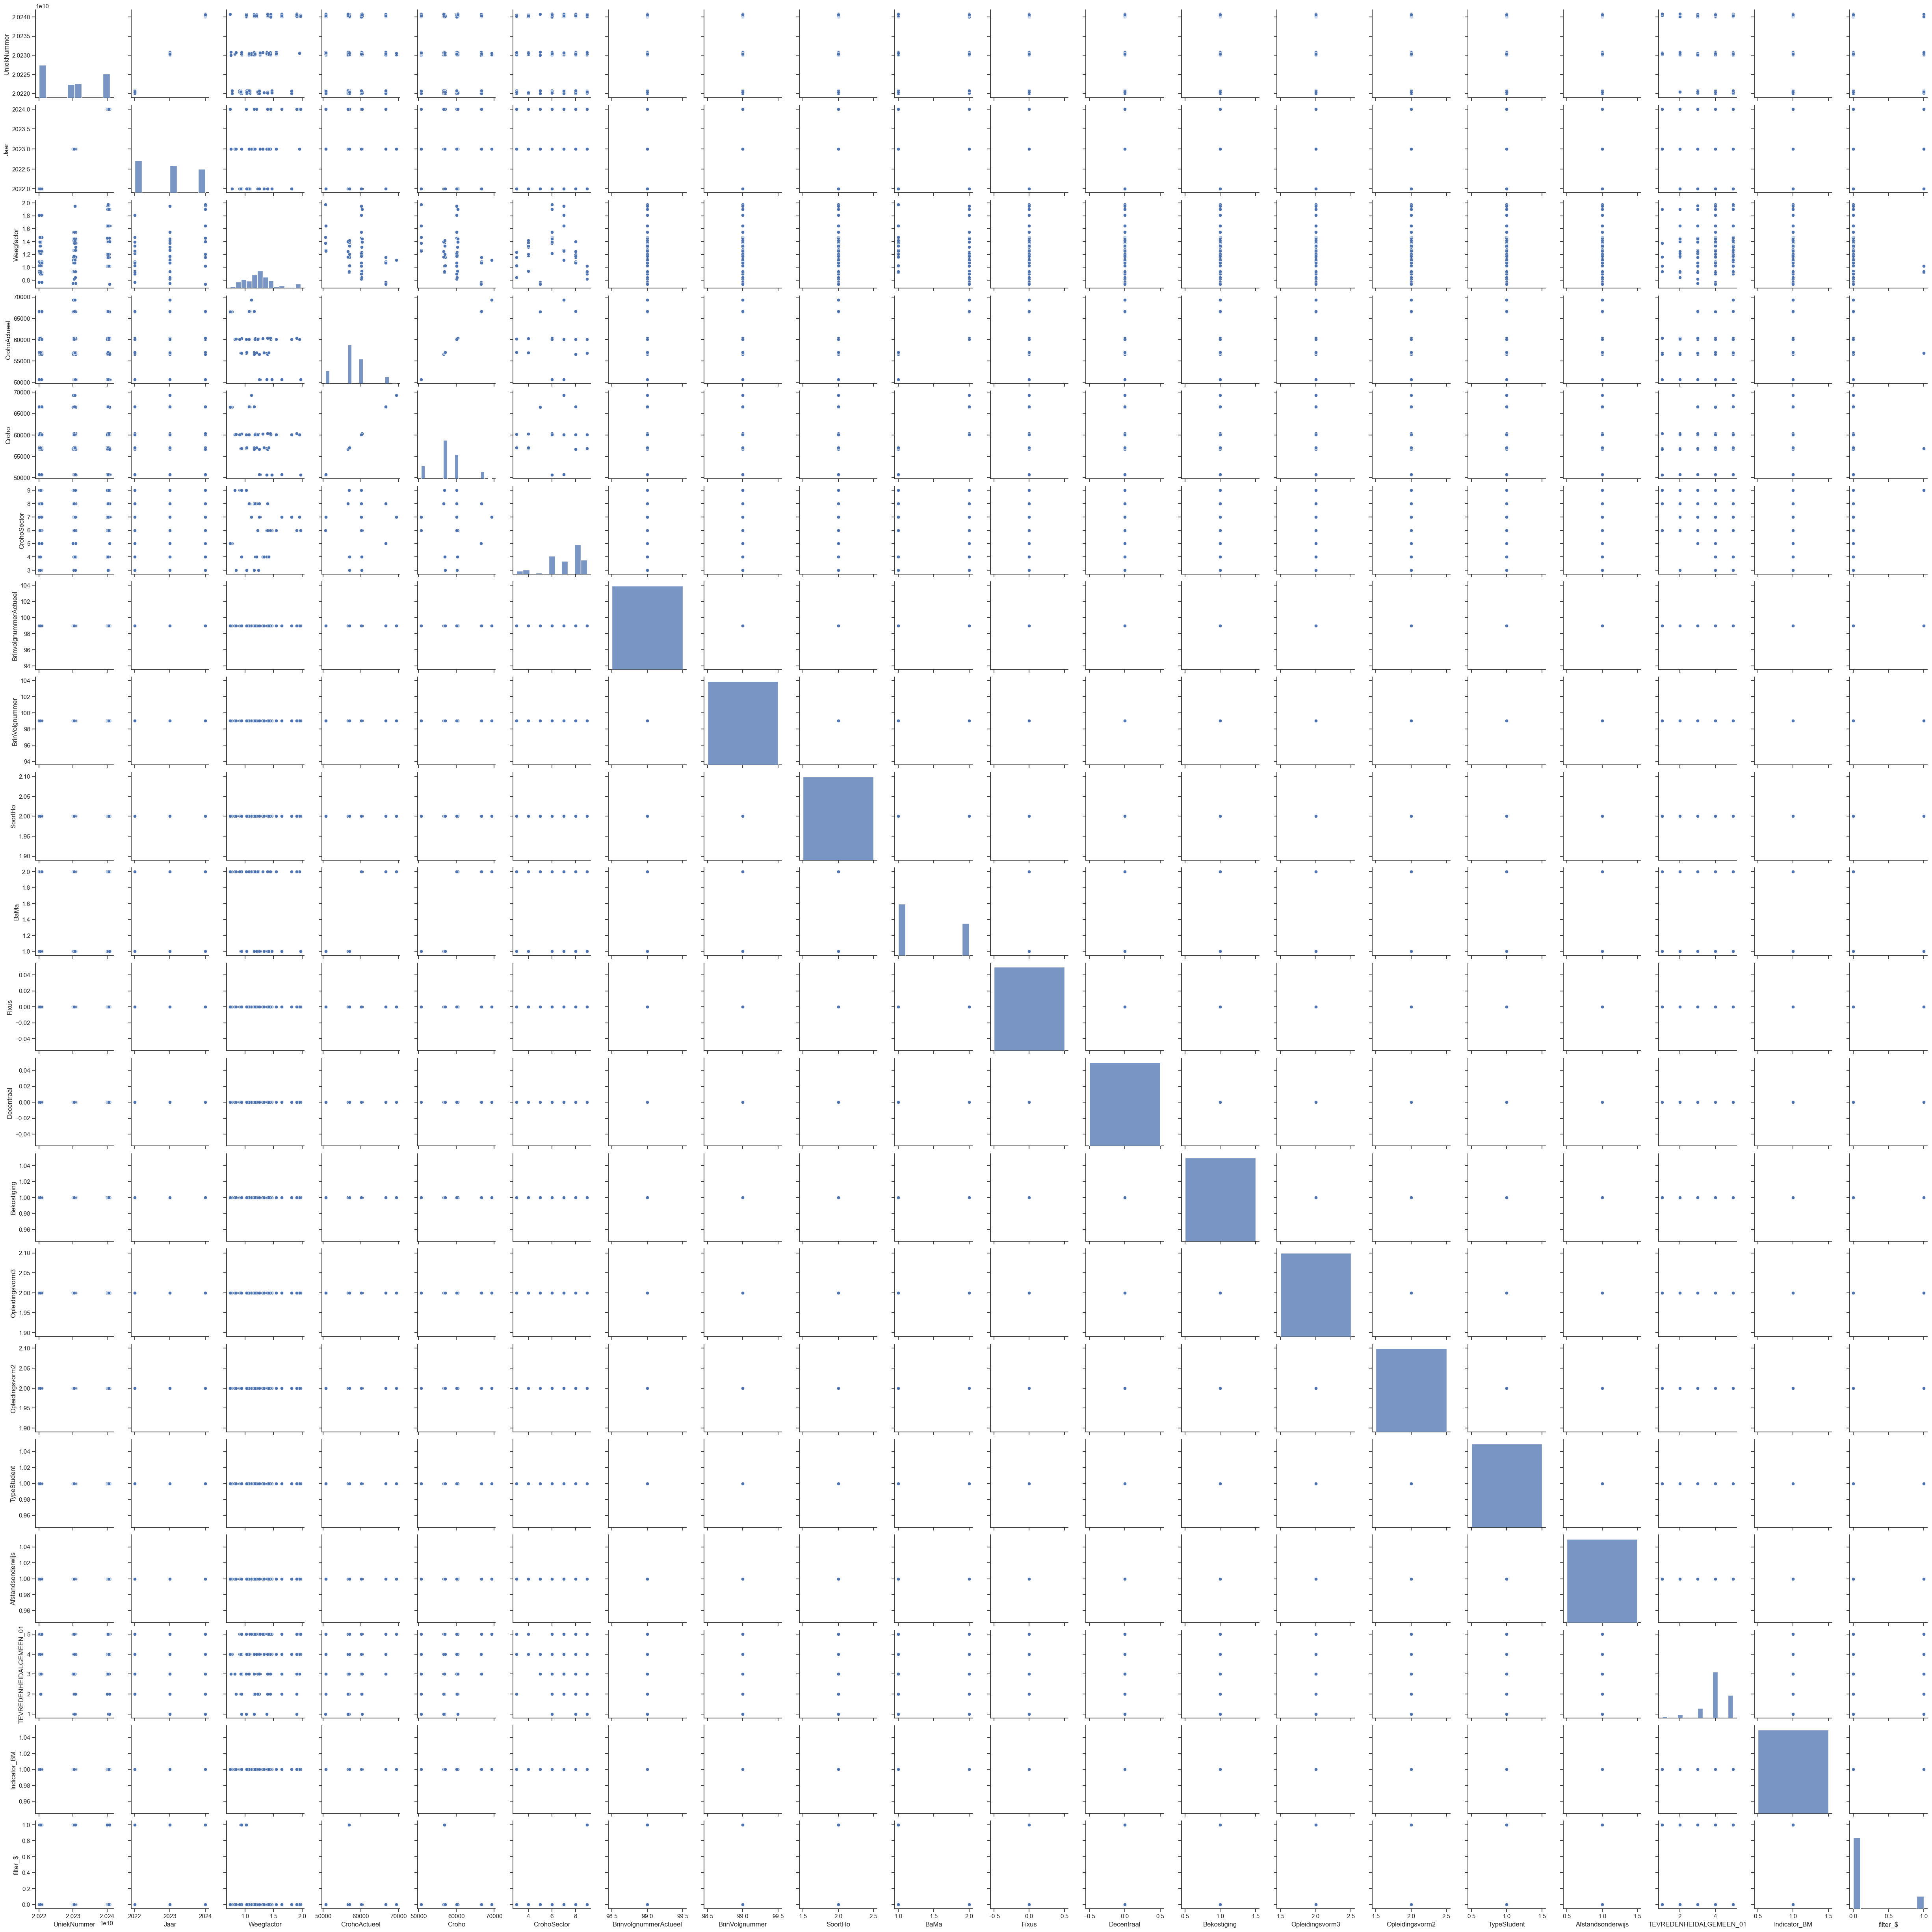

In [ ]:
# Sample the data (e.g., 5% of the original data)
sampled_df = df.sample(frac=0.05, random_state=42)

sns.set_theme(style="ticks")
sns.pairplot(sampled_df)

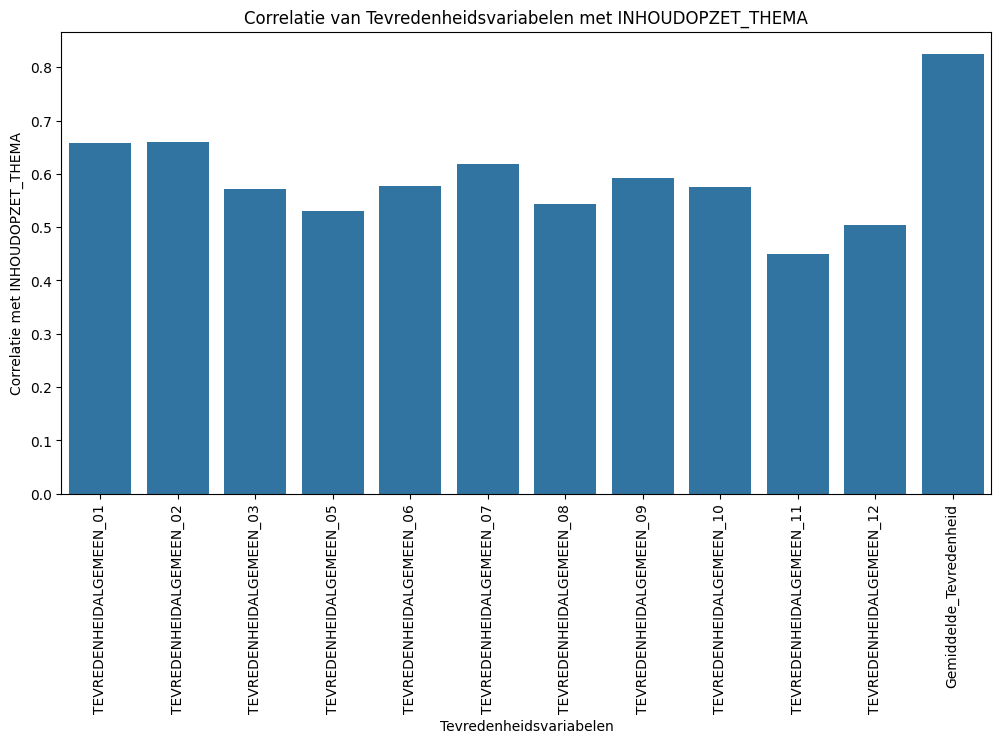

In [26]:
tevredenheid_columns = [
    'TEVREDENHEIDALGEMEEN_01', 'TEVREDENHEIDALGEMEEN_02', 'TEVREDENHEIDALGEMEEN_03', 
    'TEVREDENHEIDALGEMEEN_05', 'TEVREDENHEIDALGEMEEN_06', 'TEVREDENHEIDALGEMEEN_07', 
    'TEVREDENHEIDALGEMEEN_08', 'TEVREDENHEIDALGEMEEN_09', 'TEVREDENHEIDALGEMEEN_10', 
    'TEVREDENHEIDALGEMEEN_11', 'TEVREDENHEIDALGEMEEN_12'
]

df_imputed['Gemiddelde_Tevredenheid'] = df_imputed[tevredenheid_columns].mean(axis=1)

# Bereken correlaties
correlations = [df_imputed[column].corr(df['INHOUDOPZET_THEMA']) for column in tevredenheid_columns]
correlations.append(df['Gemiddelde_Tevredenheid'].corr(df['INHOUDOPZET_THEMA']))

plt.figure(figsize=(12, 6))
sns.barplot(x=tevredenheid_columns + ['Gemiddelde_Tevredenheid'], y=correlations)
plt.xticks(rotation=90)
plt.xlabel('Tevredenheidsvariabelen')
plt.ylabel('Correlatie met INHOUDOPZET_THEMA')
plt.title('Correlatie van Tevredenheidsvariabelen met INHOUDOPZET_THEMA')
plt.show()

In [29]:
# Resultaten opslaan
regressie_resultaten_inhoudopzet_op_tevredenheid = []
regressie_resultaten_tevredenheid_op_inhoudopzet = []

# Voer regressieanalyse uit voor de invloed van INHOUDOPZET_THEMA op tevredenheid
for column in tevredenheid_columns:
    X = df_imputed[['INHOUDOPZET_THEMA']]
    y = df_imputed[column]
    
    # Voeg een constante toe aan het model (intercept)
    X = sm.add_constant(X)
    
    # Voer de regressieanalyse uit
    model = sm.OLS(y, X).fit()
    
    # Voeg de resultaten toe aan de lijst
    regressie_resultaten_inhoudopzet_op_tevredenheid.append((column, model.rsquared, model.params['INHOUDOPZET_THEMA'], model.pvalues['INHOUDOPZET_THEMA']))

# Voer regressieanalyse uit voor de invloed van tevredenheid op INHOUDOPZET_THEMA
for column in tevredenheid_columns:
    X = df_imputed[[column]]
    y = df_imputed['INHOUDOPZET_THEMA']
    
    # Voeg een constante toe aan het model (intercept)
    X = sm.add_constant(X)
    
    # Voer de regressieanalyse uit
    model = sm.OLS(y, X).fit()
    
    # Voeg de resultaten toe aan de lijst
    regressie_resultaten_tevredenheid_op_inhoudopzet.append((column, model.rsquared, model.params[column], model.pvalues[column]))

# Resultaten omzetten naar een DataFrame voor overzichtelijkheid
resultaten_inhoudopzet_op_tevredenheid_df = pd.DataFrame(regressie_resultaten_inhoudopzet_op_tevredenheid, columns=['Tevredenheidsvariabele', 'R-kwadraat', 'Beta-coëfficiënt', 'p-waarde'])
resultaten_tevredenheid_op_inhoudopzet_df = pd.DataFrame(regressie_resultaten_tevredenheid_op_inhoudopzet, columns=['Tevredenheidsvariabele', 'R-kwadraat', 'Beta-coëfficiënt', 'p-waarde'])

# Toon de resultaten
print("Invloed van INHOUDOPZET_THEMA op Tevredenheidsvariabelen:")
print(resultaten_inhoudopzet_op_tevredenheid_df)

print("\nInvloed van Tevredenheidsvariabelen op INHOUDOPZET_THEMA:")
print(resultaten_tevredenheid_op_inhoudopzet_df)

Invloed van INHOUDOPZET_THEMA op Tevredenheidsvariabelen:
     Tevredenheidsvariabele  R-kwadraat  Beta-coëfficiënt       p-waarde
0   TEVREDENHEIDALGEMEEN_01    0.418566          0.861876   0.000000e+00
1   TEVREDENHEIDALGEMEEN_02    0.422837          0.785380   0.000000e+00
2   TEVREDENHEIDALGEMEEN_03    0.319498          0.770874   0.000000e+00
3   TEVREDENHEIDALGEMEEN_05    0.277061          0.705670   0.000000e+00
4   TEVREDENHEIDALGEMEEN_06    0.328294          0.794341   0.000000e+00
5   TEVREDENHEIDALGEMEEN_07    0.375914          0.845852   0.000000e+00
6   TEVREDENHEIDALGEMEEN_08    0.290911          0.783372   0.000000e+00
7   TEVREDENHEIDALGEMEEN_09    0.347050          0.817751   0.000000e+00
8   TEVREDENHEIDALGEMEEN_10    0.326762          0.747213   0.000000e+00
9   TEVREDENHEIDALGEMEEN_11    0.201315          0.583470  3.695332e-307
10  TEVREDENHEIDALGEMEEN_12    0.252026          0.674553   0.000000e+00

Invloed van Tevredenheidsvariabelen op INHOUDOPZET_THEMA:
     Te

      Tevredenheidsvariabele    Onafhankelijke Variabele  R-kwadraat  \
0    TEVREDENHEIDALGEMEEN_01           INHOUDOPZET_THEMA    0.455548   
1    TEVREDENHEIDALGEMEEN_01           AANSLUITING_THEMA    0.455548   
2    TEVREDENHEIDALGEMEEN_01              DOCENTEN_THEMA    0.455548   
3    TEVREDENHEIDALGEMEEN_01           BEGELEIDING_THEMA    0.455548   
4    TEVREDENHEIDALGEMEEN_01   TOETSINGBEOORDELING_THEMA    0.455548   
..                       ...                         ...         ...   
105  TEVREDENHEIDALGEMEEN_12  BETROKKENHEIDCONTACT_THEMA    0.338739   
106  TEVREDENHEIDALGEMEEN_12               STUDIEDRUK_01    0.338739   
107  TEVREDENHEIDALGEMEEN_12          VAARDIGHEDEN_THEMA    0.338739   
108  TEVREDENHEIDALGEMEEN_12            STUDIELAST_THEMA    0.338739   
109  TEVREDENHEIDALGEMEEN_12    STUDIEFACILITEITEN_THEMA    0.338739   

     Beta-coëfficiënt       p-waarde  
0            0.563819  6.598034e-149  
1            0.001495   9.040056e-01  
2            0.125

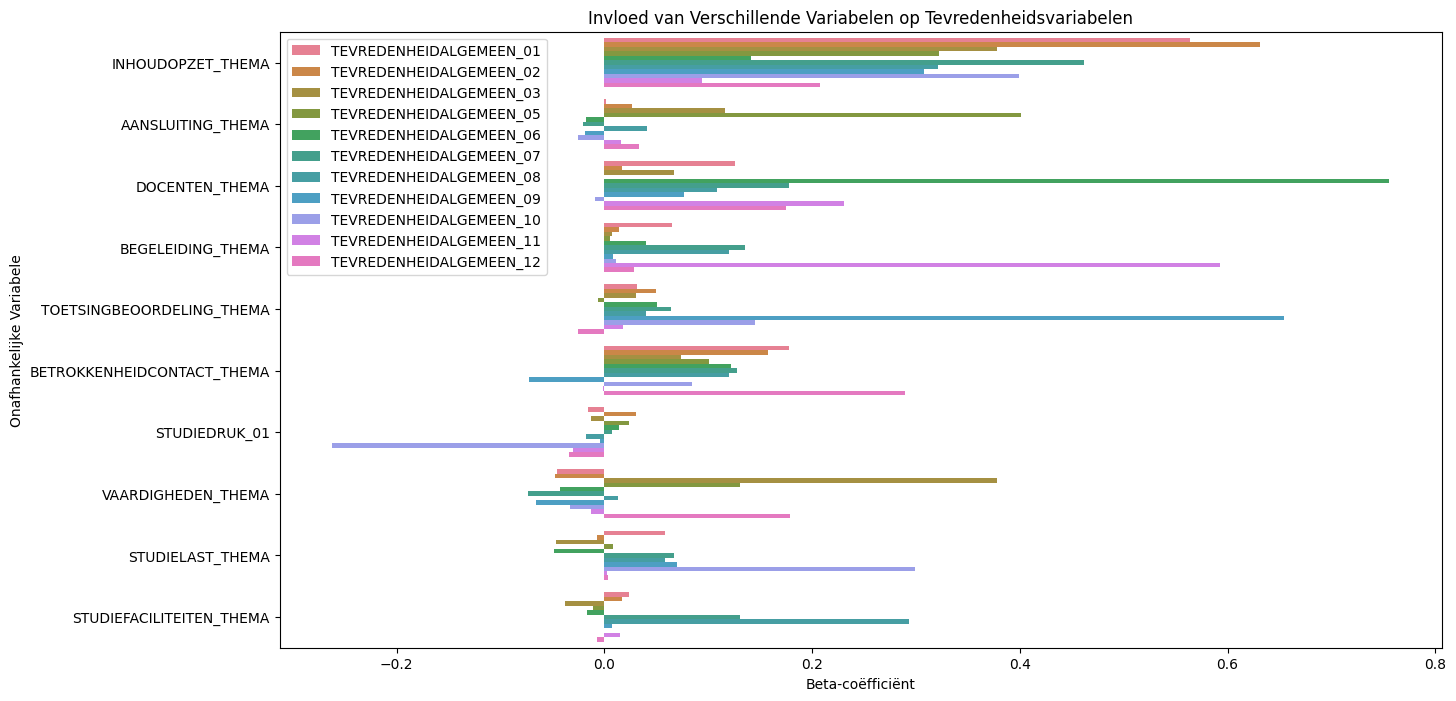

In [31]:
# Selecteer de tevredenheidsvariabelen
tevredenheid_columns = [
    'TEVREDENHEIDALGEMEEN_01', 'TEVREDENHEIDALGEMEEN_02', 'TEVREDENHEIDALGEMEEN_03', 
    'TEVREDENHEIDALGEMEEN_05', 'TEVREDENHEIDALGEMEEN_06', 'TEVREDENHEIDALGEMEEN_07', 
    'TEVREDENHEIDALGEMEEN_08', 'TEVREDENHEIDALGEMEEN_09', 'TEVREDENHEIDALGEMEEN_10', 
    'TEVREDENHEIDALGEMEEN_11', 'TEVREDENHEIDALGEMEEN_12'
]

# Selecteer de relevante onafhankelijke variabelen
onafhankelijke_variabelen = [
    'INHOUDOPZET_THEMA', 'AANSLUITING_THEMA', 'DOCENTEN_THEMA', 'BEGELEIDING_THEMA', 
    'TOETSINGBEOORDELING_THEMA', 'BETROKKENHEIDCONTACT_THEMA', 'STUDIEDRUK_01', 
    'VAARDIGHEDEN_THEMA', 'STUDIELAST_THEMA', 'STUDIEFACILITEITEN_THEMA'
]

# Resultaten opslaan
regressie_resultaten = []

# Voer regressieanalyse uit voor elke tevredenheidsvariabele
for column in tevredenheid_columns:
    X = df_imputed[onafhankelijke_variabelen]
    y = df_imputed[column]
    
    # Voeg een constante toe aan het model (intercept)
    X = sm.add_constant(X)
    
    # Voer de regressieanalyse uit
    model = sm.OLS(y, X).fit()
    
    # Voeg de resultaten toe aan de lijst
    for var in onafhankelijke_variabelen:
        regressie_resultaten.append((column, var, model.rsquared, model.params[var], model.pvalues[var]))

# Resultaten omzetten naar een DataFrame voor overzichtelijkheid
resultaten_df = pd.DataFrame(regressie_resultaten, columns=['Tevredenheidsvariabele', 'Onafhankelijke Variabele', 'R-kwadraat', 'Beta-coëfficiënt', 'p-waarde'])

# Toon de resultaten
print(resultaten_df)

# Visualiseer de beta-coëfficiënten van de regressieanalyse
plt.figure(figsize=(15, 8))
sns.barplot(x='Beta-coëfficiënt', y='Onafhankelijke Variabele', hue='Tevredenheidsvariabele', data=resultaten_df)
plt.title('Invloed van Verschillende Variabelen op Tevredenheidsvariabelen')
plt.xlabel('Beta-coëfficiënt')
plt.ylabel('Onafhankelijke Variabele')
plt.legend(loc='best')
plt.show()

# Data preparatie (Dimensie reductie, normalisatie en outliers verwijderen)

PCA (Principale Componenten Analyse) is een statistische techniek die wordt gebruikt om de dimensionaliteit van een dataset te verminderen. Het identificeert de belangrijkste variaties in de data door nieuwe, ongecorreleerde variabelen te creëren, genaamd hoofdcomponenten, die een groot deel van de variatie in de originele dataset verklaren. Deze hoofdcomponenten zijn lineaire combinaties van de oorspronkelijke variabelen en worden gerangschikt op basis van de hoeveelheid variatie die ze verklaren. Door alleen de eerste paar hoofdcomponenten te gebruiken, kan PCA de complexiteit van de data verminderen terwijl de belangrijkste informatie behouden blijft.

Bron: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Dimensiereductie helpt bij het vereenvoudigen van complexe datasets door het aantal variabelen te verminderen, wat leidt tot snellere en efficiëntere modellen. Het vermindert het risico op overfitting door irrelevante of redundante features te elimineren. Hierdoor wordt de interpretatie en visualisatie van data eenvoudiger. Bovendien verlaagt het de computationele kosten en maakt het de verwerking van de data minder resource-intensief. Uiteindelijk kan het de prestaties en generaliseerbaarheid van machine learning modellen verbeteren. Voor deze reden is er deze week gekozen dimensie reductie toe te passen ter voorbereiding van de dataset.

Daarnaast is ter voorbereiding van de dataset de dataset genormaliseerd om ervoor te zorgen dat alle variabelen evenveel bijdragen aan de analyse, ongeacht hun oorspronkelijke schaal of eenheden. Dit voorkomt dat variabelen met grotere waarden domineren.

Ten slotte zij ter voorbereiding van de dataset de outliers verwijdert. De drempelwaarde hiervan is minimaal behouden vanwege de grootte van de dataset (1073 regels). Een Z-score drempelwaarde van 7 impliceert dat alleen data punten die meer dan 7 standaarddeviaties van het gemiddelde afwijken als outliers worden beschouwd. Dit betekent dus dat slechts zeer extreme waarden worden als outliers beschouwd en verwijderd, wat betekent dat de meeste data punten in de dataset behouden blijven.


In [ ]:
def process_pca(df, threshold=7):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numerical = df[numerical_cols]

    z_scores = np.abs(zscore(df_numerical))
    df_no_outliers = df_numerical[(z_scores < threshold).all(axis=1)]

    if df_no_outliers.empty:
        print("All rows are considered outliers with the current threshold.")
        return None, None, None
    else:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_no_outliers)

        pca = PCA()
        pca.fit(scaled_data)

        cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance >= 0.95) + 1

        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(scaled_data)

        pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}' for i in range(n_components)])

        return pca_df, cumulative_variance, n_components, scaled_data, pca_result

## Optimale PCA hoeveelheid berekening en visualisatie.

         0         1         2         3         4         5         6   \
0 -3.076227 -0.788098  1.728520 -2.541883  0.814825  1.552427 -0.827403   
1  3.609146  1.053223  0.665177  1.329611  2.894744  2.814327  0.485957   
2 -7.334384 -0.047398  0.266260  0.645874  2.041947  0.810080  0.419384   
3 -0.179599 -2.360116 -0.150040 -1.525225  0.629690  0.522248  0.434642   
4  1.584150 -2.204622  0.985947 -2.194428 -0.072800  0.129059  0.074199   

         7         8         9   ...        80        81        82        83  \
0  1.091900 -0.204778 -0.092741  ... -0.363621  0.408699  0.705148 -0.478093   
1 -1.841638  0.715903  0.061844  ...  1.002050  1.464011  0.390055 -0.570778   
2 -2.867314 -0.060954 -0.668726  ...  0.219044 -1.078136 -0.397154 -0.305343   
3 -0.622147  0.078338 -0.039348  ...  0.002919  0.238748  0.235225  0.404916   
4 -1.432881  0.789738 -0.059901  ...  0.304550 -0.392211  0.034284  0.281979   

         84        85        86        87        88        89  
0 -0

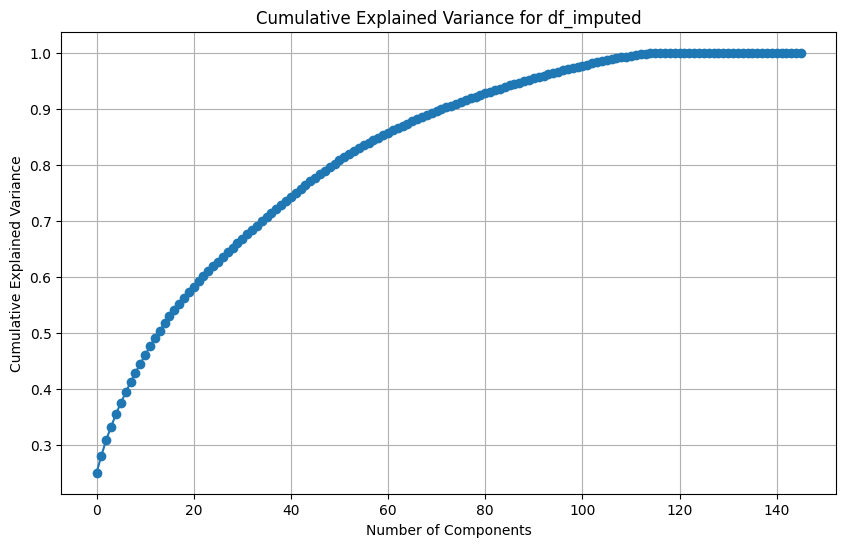

In [6]:
# Functie PCA processing 
def process_pca(df, explained_variance_threshold=0.95):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA()
    pca_result = pca.fit(scaled_data)
    
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    
    pca = PCA(n_components=n_components)
    pca_df = pd.DataFrame(pca.fit_transform(scaled_data))
    
    return pca_df, cumulative_variance, n_components, scaled_data, pca_result

# Run PCA op df_imputed
pca_df_imputed, cumulative_variance_imputed, n_components_imputed, scaled_data_imputed, pca_result_imputed = process_pca(df_imputed)

if pca_df_imputed is not None:
    print(pca_df_imputed.head())
    print(f'Number of components selected for df_imputed: {n_components_imputed}')

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance_imputed, marker='o')
    plt.title('Cumulative Explained Variance for df_imputed')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

In [7]:
# Weergeven data types van de kolommen
print("Data Types:")
print(pca_df_imputed.dtypes)

Data Types:
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
85    float64
86    float64
87    float64
88    float64
89    float64
Length: 90, dtype: object


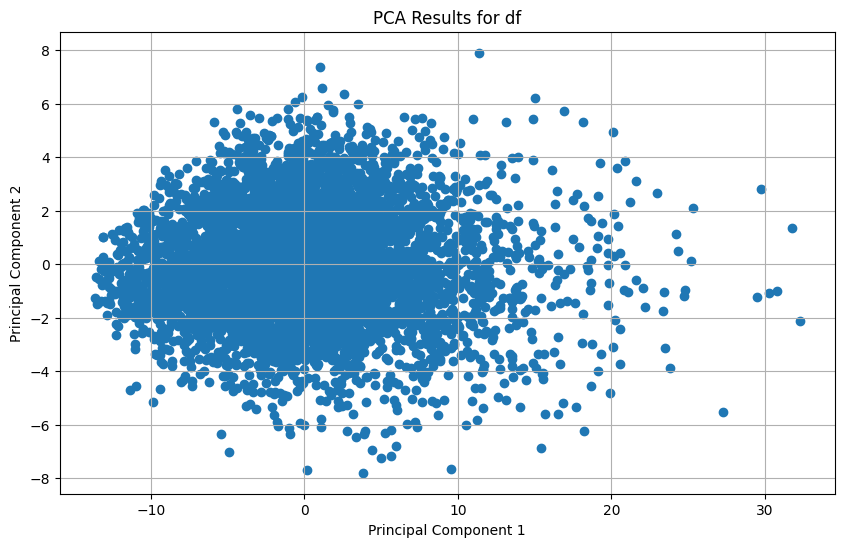

In [8]:
# Controleer of er minstens 2 componenten zijn en plot PCA componenten 1 en 2
if n_components_imputed >= 2:  # Controleer of er minstens 2 componenten zijn
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df_imputed.iloc[:, 0], pca_df_imputed.iloc[:, 1])
    plt.title('PCA Results for df')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
else:
    print("Not enough components to plot PCA1 vs PCA2")

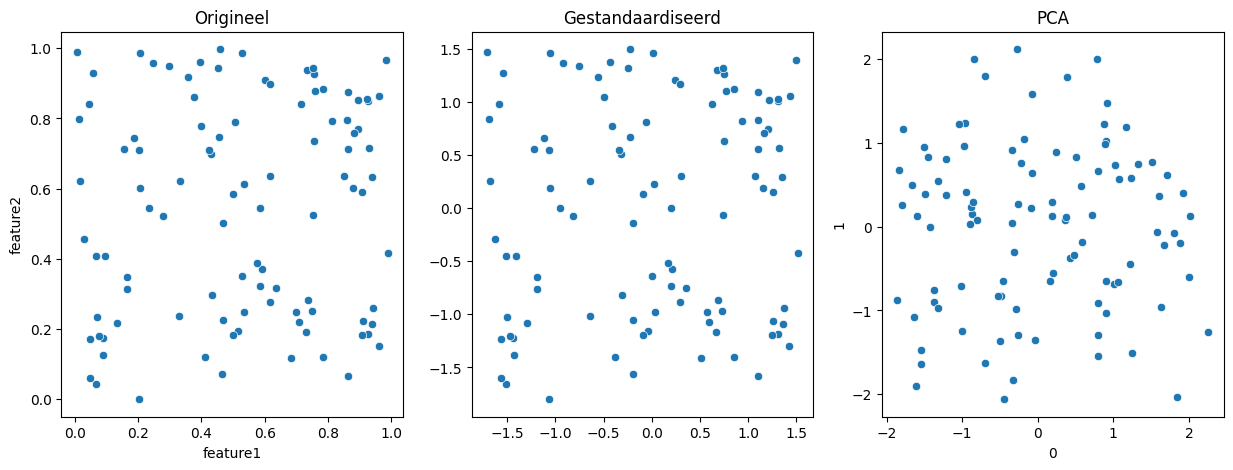

In [9]:
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100)
}
df_imputed = pd.DataFrame(data)

# Run PCA op df_imputed
pca_df_imputed, cumulative_variance_imputed, n_components_imputed, scaled_data_imputed, pca_result_imputed = process_pca(df_imputed)

# Visualiseren van de originele, genormaliseerde en PCA getransformeerde data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Voor visualisatie selecteren we willekeurige kenmerken
random_features = df_imputed.columns[:2]

sns.scatterplot(ax=axes[0], x=df_imputed[random_features[0]], y=df_imputed[random_features[1]])
axes[0].set_title('Origineel')

sns.scatterplot(ax=axes[1], x=scaled_data_imputed[:, df_imputed.columns.get_loc(random_features[0])], y=scaled_data_imputed[:, df_imputed.columns.get_loc(random_features[1])])
axes[1].set_title('Gestandaardiseerd')

if n_components_imputed >= 2:
    sns.scatterplot(ax=axes[2], x=pca_df_imputed.iloc[:, 0], y=pca_df_imputed.iloc[:, 1])
    axes[2].set_title('PCA')
else:
    axes[2].set_title('PCA (not enough components)')

plt.show()

Om het even terug te nemen naar de matrix visualisatie voor random features, hier worden deze weergegeven mét de speciale uitlijning voor "TEVREDENHEIDALGEMEEN_01".

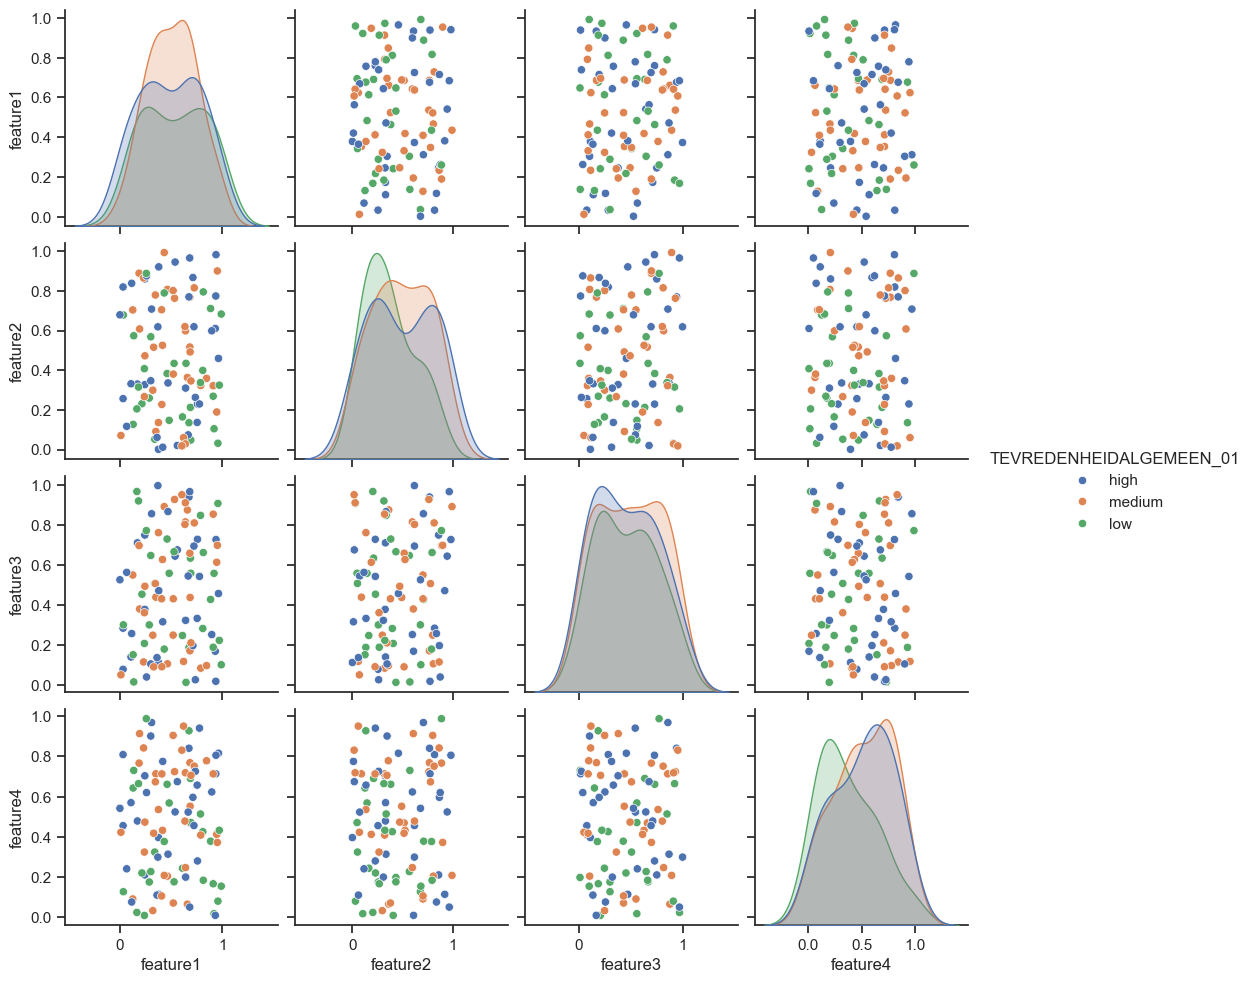

In [20]:
# Gegevens genereren
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'TEVREDENHEIDALGEMEEN_01': np.random.choice(['low', 'medium', 'high'], 100)  # Dummy categorische data voor hue
}
df_imputed = pd.DataFrame(data)

# Pairplot met 'TEVREDENHEIDALGEMEEN_01' als kleur
sns.set_theme(style="ticks")
sns.pairplot(df_imputed.select_dtypes(include=[np.number]).assign(TEVREDENHEIDALGEMEEN_01=df_imputed['TEVREDENHEIDALGEMEEN_01']), hue='TEVREDENHEIDALGEMEEN_01')
plt.show()

Vervolgens zijn nog twee codeblocks uit het Jupyter Notebook van discussiecollege 2 toegepast om het verschil tussen de originele data, de gestandaardiseerde data en de PCA data te onderscheiden. De code is aangepast op de data van de OU, maar de code zelf is dus van het discussiecollege 2 van Data Science (gebruikt random features).

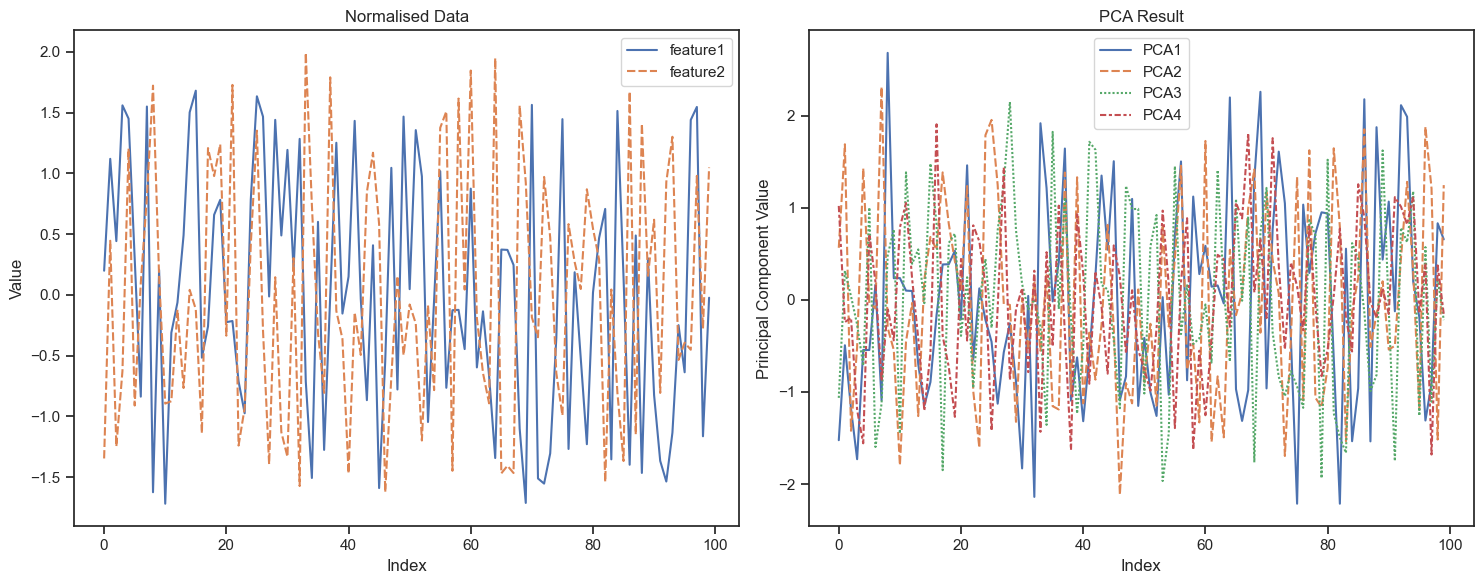

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gebruikt genormaliseerde data en PCA resultaten
std_df = pd.DataFrame(scaled_data_imputed, columns=df_imputed.select_dtypes(include=[np.number]).columns)
pca_df = pd.DataFrame(pca_result_imputed.transform(scaled_data_imputed), columns=[f"PCA{i+1}" for i in range(n_components_imputed)])

# Willekeurige kenmerken selecteren voor visualisatie
random_features = np.random.choice(std_df.columns, size=2, replace=False)

# Lijnplot van twee genormaliseerde kolommen
sns.lineplot(ax=axes[0], data=std_df[random_features])
axes[0].set_title('Normalised Data')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

# Lijnplot van PCA resultaten
sns.lineplot(ax=axes[1], data=pca_df)
axes[1].set_title('PCA Result')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Principal Component Value')

plt.tight_layout()
plt.show()

> Zoals bij de cumulatieve verklaarde variantie werd aangetoond, verklaart elke PCA-component dat elkaar opvolgt steeds minder variantie van de dataset.

Ten slotte is er nog extra visualisatie naar de verschillende PCA's voor beide datasets uitgevoerd en een clusteranalyse per dataset voor de PCA"s.

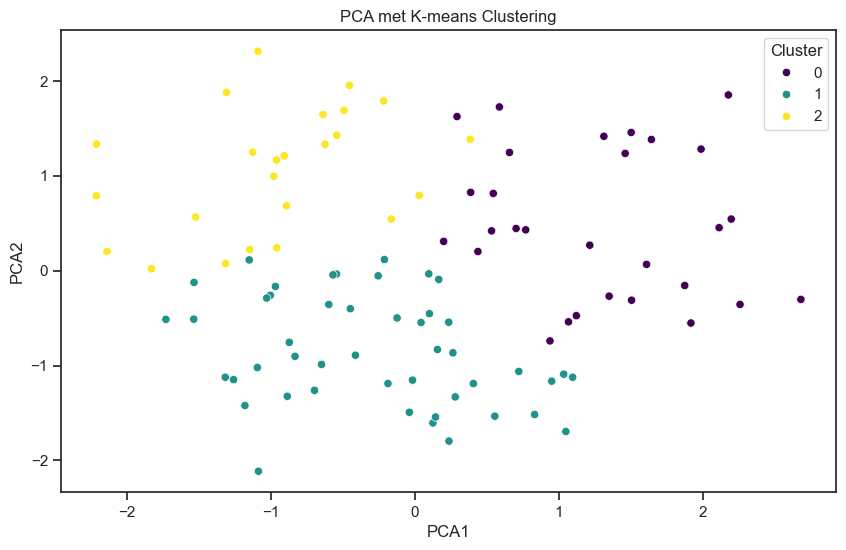

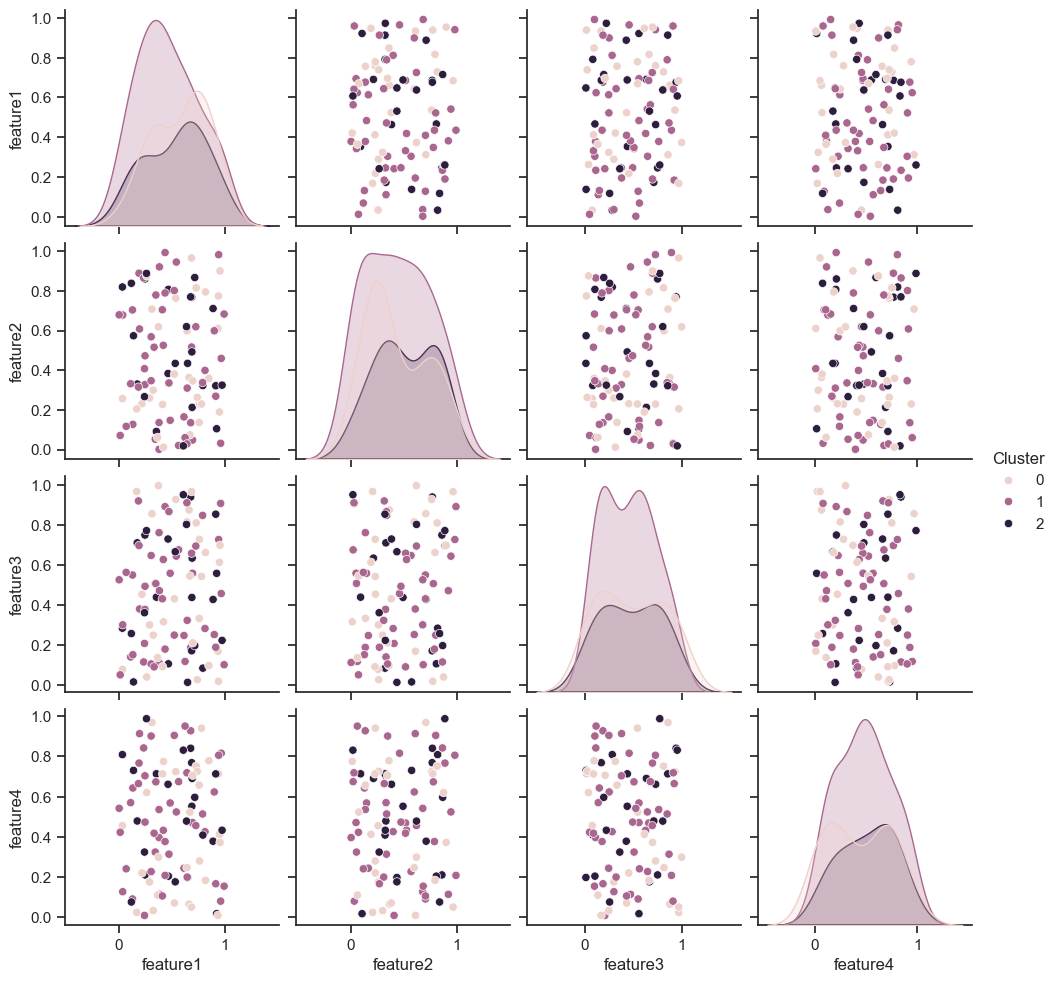

In [24]:
# Clusteranalyse met k-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Voeg de clusters toe aan de PCA DataFrame voor visualisatie
pca_df['Cluster'] = clusters
df_imputed['Cluster'] = clusters

# Visualisatie van de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1], hue=pca_df['Cluster'], palette='viridis')
plt.title('PCA met K-means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Pairplot met clusters
sns.set_theme(style="ticks")
sns.pairplot(df_imputed.select_dtypes(include=[np.number]).assign(Cluster=df_imputed['Cluster']), hue='Cluster')
plt.show()